# Session 1: Data Preprocessing with the Titanic Dataset

In this notebook, we will:
- Load and explore the Titanic dataset  
- Identify and handle missing values  
- Encode categorical variables  
- Scale numerical features  
- Split the data into training and testing sets  

Dataset source: `seaborn.load_dataset("titanic")`

### Titanic Dataset: Variable Description

The Titanic dataset contains information about passengers on the Titanic and whether they survived the disaster.  
Below is a short description of each column:

| Column | Type | Description |
|---------|------|-------------|
| **survived** | int (0 = No, 1 = Yes) | Whether the passenger survived. This will be our target variable in later sessions. |
| **pclass** | int (1, 2, 3) | Passenger class — a proxy for socioeconomic status (1st = upper, 2nd = middle, 3rd = lower). |
| **sex** | category | Gender of the passenger (`male`, `female`). |
| **age** | float | Age of the passenger in years. May contain missing values. |
| **sibsp** | int | Number of siblings or spouses aboard the Titanic. |
| **parch** | int | Number of parents or children aboard the Titanic. |
| **fare** | float | Ticket fare paid by the passenger (in British pounds). |
| **embarked** | category | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton). May contain missing values. |
| **class** | category | Duplicate of `pclass`, but stored as a categorical variable (`First`, `Second`, `Third`). |
| **who** | category | Simplified description of the passenger (`man`, `woman`, `child`). |
| **adult_male** | bool | Whether the passenger is an adult male (True/False). |
| **deck** | category | Deck level where the passenger’s cabin was located. Many values are missing. |
| **embark_town** | category | Full name of the embarkation town (`Cherbourg`, `Queenstown`, `Southampton`). Similar to `embarked`. |
| **alive** | category | Text version of survival status (`yes` / `no`). |
| **alone** | bool | Whether the passenger traveled alone. |


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Display first rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exploring the Titanic Dataset

Let's start by inspecting the structure of our data:
- What are the column names?
- What types of variables do we have?
- Are there any missing values?


In [3]:
# Basic info and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Count missing values per column
df.isnull().sum()
# df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Exercise 1

1. Check how many unique values each column has.  
2. Identify which columns are categorical and which are numerical.  
3. Plot one or two distributions (e.g., `age`, `fare`) using `sns.histplot`.

*Hint:* use `df.nunique()` and `sns.histplot(df['age'])`.

**1. Check how many unique values each column has**

In [8]:
# Number of unique values
print(df.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


**2. Identify which columns are categorical and which are numerical.**

In [10]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

**3. Plot one or two distributions (e.g., `age`, `fare`) using `sns.histplot`.**

<AxesSubplot:xlabel='age', ylabel='Count'>

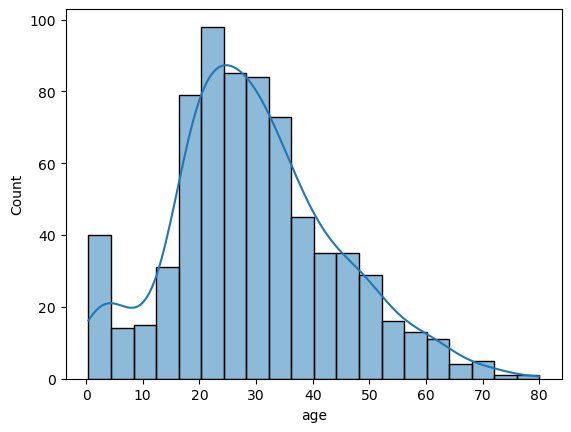

In [9]:
# Example distribution plot
sns.histplot(df['age'], kde=True)

## Handling Missing Values

Let's look closer at missing data:
- The `age` column has some missing entries.
- The `embarked` column also contains missing values.

We can:
1. Drop rows or columns with too many NaNs.
2. Fill (impute) missing values with mean, median, or most frequent values.


In [17]:
# Check missing data again
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# Let's check these two variables before imputing
df[['age', 'embarked']].head(20)

,age,embarked
0,22.0,S
1,38.0,C
2,26.0,S
3,35.0,S
4,35.0,S
5,NaN,Q
6,54.0,S
7,2.0,S
8,27.0,S
9,14.0,C


In [21]:
# Fill missing ages with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing embarked with most common value
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df[['age', 'embarked']].head(20)

,age,embarked
0,22.0,S
1,38.0,C
2,26.0,S
3,35.0,S
4,35.0,S
5,28.0,Q
6,54.0,S
7,2.0,S
8,27.0,S
9,14.0,C


In [22]:
# Verify
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Exercise 2

Try to:
1. Inspect the `deck` and `embark_town` columns.  
2. Decide how you would handle their missing values.  
3. Apply your chosen strategy (drop, fill, and how to fill).

*Discuss your reasoning:* When is it better to drop vs impute?


**1. Inspect the `deck` and `embark_town` columns.**

In [34]:
# Check the first few rows
print(df[['deck', 'embark_town']].head(10))

# Check how many missing values remain in the dataset
print('\nNumber of missing values')
print(df[['deck', 'embark_town']].isnull().sum())

# Percentage of missing values
print('\nPercentage of missing values')
df[['deck', 'embark_town']].isnull().mean() * 100


  deck  embark_town
0  NaN  Southampton
1    C    Cherbourg
2  NaN  Southampton
3    C  Southampton
4  NaN  Southampton
5  NaN   Queenstown
6    E  Southampton
7  NaN  Southampton
8  NaN  Southampton
9  NaN    Cherbourg

Number of missing values
deck           688
embark_town      2
dtype: int64

Percentage of missing values


deck           77.216611
embark_town     0.224467
dtype: float64

**2. Decide how you would handle their missing values.**  

In [35]:
# For deck: Since most values are missing, imputing would add noise. Drop the column.
# For embark_town: Only two missing. Fill with the mode (most frequent value). Since it is a categorical variable we cannot compute mean or median.

**3. Apply your chosen strategy (drop, fill, and how to fill).**

In [36]:
# Drop 'deck' column (too many missing values)
df = df.drop(columns=['deck'])

# Fill missing 'embark_town' with its most frequent value
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Verify that missing values are handled
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

**Bonus exercise: try imputation using interpolate for numerical variables**

In [66]:
linear_interpolation = df['age'].interpolate(method='linear')
quadratic_interpolation = df['age'].interpolate(method='quadratic')

print("\nLinear Interpolation:")
print(linear_interpolation)

print("\nQuadratic Interpolation:")
print(quadratic_interpolation)


Linear Interpolation:
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Quadratic Interpolation:
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    20.205792
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


## Encoding Categorical Variables

Machine learning models require numerical input.
We need to **encode** categorical variables such as `sex`, `class`, and `embarked`.

Common approaches:
- **Label encoding:** assign integer IDs (good for ordinal categories)
- **One-Hot encoding:** create binary columns for each category (good for nominal categories)


In [27]:
categorical_cols = ['sex', 'class', 'embarked']

encoder = OneHotEncoder(drop='first', sparse=False)
encoded = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

encoded.head()


,sex_male,class_Second,class_Third,embarked_Q,embarked_S
0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0


### Exercise 3 – Encoding Categorical Variables

So far, we’ve seen how to use **One-Hot Encoding** to convert categorical features into binary variables.  
Now let’s go deeper and compare it with **Label Encoding**.

1. Identify which categorical columns are **ordinal** (with a meaningful order) and which are **nominal** (no inherent order).   
2. Apply **Label Encoding** to the ordinal feature(s).  
3. Apply **One-Hot Encoding** to the nominal feature(s).  
4. Combine all encoded columns into a single processed dataset with the numerical variables.  
5. Compare the two encoding methods — what are the pros and cons of each?

*Hint:*  
You can use `sklearn.preprocessing.LabelEncoder` for label encoding and `OneHotEncoder` for one-hot encoding.


**1. Identify which categorical columns are **ordinal** (with a meaningful order) and which are **nominal** (no inherent order).**

In [39]:
ordinal_col = ['class']       # has order: First > Second > Third
nominal_cols = ['sex', 'embarked']

**2. Apply **Label Encoding** to the ordinal feature(s).**

In [ ]:
label_encoder = LabelEncoder()
encoded_ordinal = label_encoder.fit_transform(df[ordinal_col])
encoded_ordinal = pd.DataFrame(encoded_ordinal, columns=['class_encoded'])
encoded_ordinal

/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,class_encoded
0,2
1,0
2,2
3,0
4,2
...,...
886,1
887,0
888,2
889,0


**3. Apply **One-Hot Encoding** to the nominal feature(s).**

In [45]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_nominal = pd.DataFrame(
    onehot_encoder.fit_transform(df[nominal_cols]),
    columns=onehot_encoder.get_feature_names_out(nominal_cols)
)
encoded_nominal

,sex_male,embarked_Q,embarked_S,embarked_nan
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
886,1.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


**4. Combine all encoded columns into a single processed dataset with the numerical variables.**

In [46]:
numeric_cols = ['age', 'fare', 'sibsp', 'parch']
df_encoded = pd.concat(
    [df[numeric_cols].reset_index(drop=True),
     encoded_ordinal.reset_index(drop=True),
     encoded_nominal.reset_index(drop=True)],
    axis=1
)

df_encoded.head()

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
0,22.0,7.2500,1,0,2,1.0,0.0,1.0,0.0
1,38.0,71.2833,1,0,0,0.0,0.0,0.0,0.0
2,26.0,7.9250,0,0,2,0.0,0.0,1.0,0.0
3,35.0,53.1000,1,0,0,0.0,0.0,1.0,0.0
4,35.0,8.0500,0,0,2,1.0,0.0,1.0,0.0


**5. Compare the two encoding methods — what are the pros and cons of each?**

| Encoding Method | When to Use | Pros | Cons |
|------------------|-------------|------|------|
| **Label Encoding** | Ordinal data (natural order) | Compact, preserves order | Artificial order if used on nominal data |
| **One-Hot Encoding** | Nominal data (no order) | No false numeric relationships | Increases dimensionality |

**Question for Discussion:**  
- What would happen if we used label encoding on `sex` or `embarked`?  
  → Models would interpret categories as numeric magnitudes (`male` > `female`?), which makes no sense!


## Feature Scaling

Many ML algorithms (e.g., k-NN, SVM, gradient descent-based methods) are sensitive to feature scale.  
Common techniques:
- **Standardization (Z-score):** subtract mean, divide by std.
- **Min–Max scaling:** rescale to [0, 1].


In [49]:
scaler = StandardScaler()
scaled_standard = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

scaled_standard.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
age,714.0,2.174187e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
fare,891.0,-4.373606e-17,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
sibsp,891.0,3.456519e-16,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
parch,891.0,6.716164e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
class_encoded,891.0,-2.031048e-16,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377


### Exercise 4 – Compare Feature Scaling Methods

So far, we’ve applied **StandardScaler**, which rescales features to have a mean of 0 and standard deviation of 1.

1. Apply **MinMaxScaler** to the same dataset.  
2. Compare the results between StandardScaler and MinMaxScaler.  
3. Visualize the effect of both scaling methods on a feature (e.g., `fare`).  
4. Discuss: when might one method be preferred over the other?

*Hints:*
- Use `from sklearn.preprocessing import MinMaxScaler`.
- The Min–Max formula rescales features to a fixed range, typically [0, 1].


**1. Apply **MinMaxScaler** to the same dataset.**

In [52]:
scaler_minmax = MinMaxScaler()
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_encoded), columns=df_encoded.columns)
scaled_minmax.head()

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
0,0.271174,0.014151,0.125,0.0,1.0,1.0,0.0,1.0,0.0
1,0.472229,0.139136,0.125,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,0.000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.434531,0.103644,0.125,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,0.000,0.0,1.0,1.0,0.0,1.0,0.0


**2. Compare the results between StandardScaler and MinMaxScaler.**

In [54]:
print("StandardScaler summary:")
display(scaled_standard.describe().T.head())

print("MinMaxScaler summary:")
display(scaled_minmax.describe().T.head())

StandardScaler summary:


,count,mean,std,min,25%,50%,75%,max
age,714.0,2.174187e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
fare,891.0,-4.373606e-17,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
sibsp,891.0,3.456519e-16,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
parch,891.0,6.716164e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
class_encoded,891.0,-2.031048e-16,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377


MinMaxScaler summary:


,count,mean,std,min,25%,50%,75%,max
age,714.0,0.367921,0.182540,0.0,0.247612,0.346569,0.472229,1.0
fare,891.0,0.062858,0.096995,0.0,0.015440,0.028213,0.060508,1.0
sibsp,891.0,0.065376,0.137843,0.0,0.000000,0.000000,0.125000,1.0
parch,891.0,0.063599,0.134343,0.0,0.000000,0.000000,0.000000,1.0
class_encoded,891.0,0.654321,0.418036,0.0,0.500000,1.000000,1.000000,1.0


**3. Visualize the effect of both scaling methods on a feature (e.g., `fare`).**

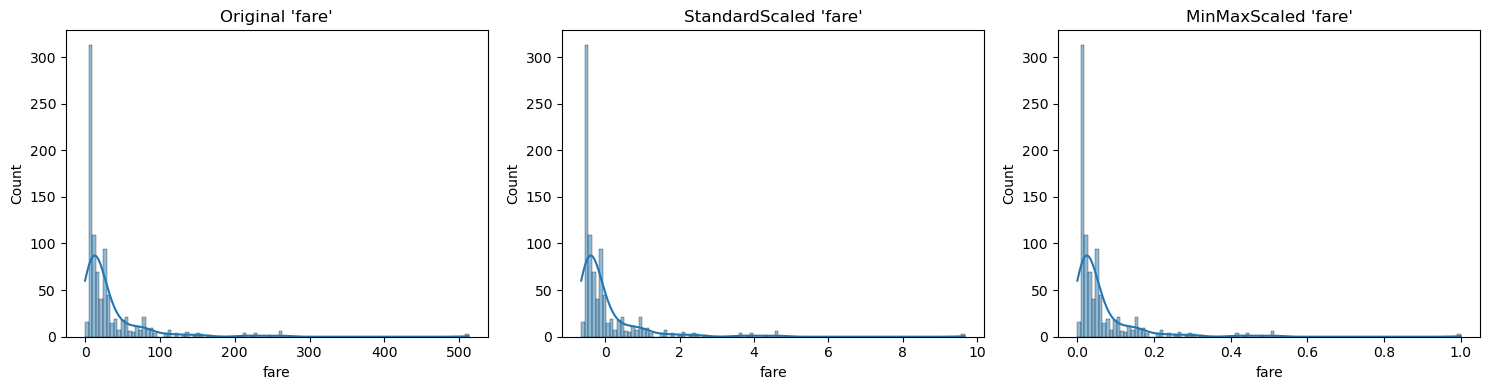

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_encoded['fare'], kde=True, ax=axes[0])
axes[0].set_title("Original 'fare'")

sns.histplot(scaled_standard['fare'], kde=True, ax=axes[1])
axes[1].set_title("StandardScaled 'fare'")

sns.histplot(scaled_minmax['fare'], kde=True, ax=axes[2])
axes[2].set_title("MinMaxScaled 'fare'")

plt.tight_layout()
plt.show()

**4. Discuss: when might one method be preferred over the other?**

| Scaler | Description | When to Use | Pros | Cons |
|---------|--------------|-------------|------|------|
| **StandardScaler** | Centers data (mean=0, std=1) | Works well for algorithms assuming normal distribution (e.g. Logistic Regression, SVM, PCA) | Handles outliers better | Doesn’t bound values |
| **MinMaxScaler** | Rescales features to [0,1] | Useful when features have fixed boundaries or when using distance-based algorithms (e.g. kNN, Neural Networks) | Keeps feature magnitudes comparable | Sensitive to outliers |

## Train/Test Split

We now have a clean, encoded, and scaled dataset.
Let’s split it into **training** and **testing** subsets to prepare for modeling.

- `train_test_split` ensures models can generalize.  
- Typical ratio: 80 % training / 20 % testing.


In [56]:
# Define target variable
X = scaled_standard
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 9), (179, 9))

In [57]:
X_train

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
331,1.088491,-0.074583,-0.474545,-0.473674,-1.566107,0.737695,-0.307562,0.619306,-0.047431
733,-0.461489,-0.386671,-0.474545,-0.473674,-0.369365,0.737695,-0.307562,0.619306,-0.047431
382,0.158503,-0.488854,-0.474545,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
704,-0.254825,-0.490280,0.432793,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
813,-1.632584,-0.018709,3.154809,2.008933,0.827377,-1.355574,-0.307562,0.619306,-0.047431
...,...,...,...,...,...,...,...,...,...
106,-0.599265,-0.494391,-0.474545,-0.473674,0.827377,-1.355574,-0.307562,0.619306,-0.047431
270,NaN,-0.024246,-0.474545,-0.473674,-1.566107,0.737695,-0.307562,0.619306,-0.047431
860,0.778495,-0.364355,1.340132,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
435,-1.081480,1.767741,0.432793,2.008933,-1.566107,-1.355574,-0.307562,0.619306,-0.047431


### Exercise 5

1. Repeat the split using `test_size=0.3` and then `0.5`.  
2. Observe how the size of the training set changes.  
3. What happens if we change the random_state parameter?
4. Discuss: what are the trade-offs between a larger training or test set?


**1. Repeat the split using `test_size=0.3` and then `0.5`.**

In [60]:
# 70/30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train_70

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
445,-1.770360,0.999770,-0.474545,2.008933,-1.566107,0.737695,-0.307562,0.619306,-0.047431
650,NaN,-0.489442,-0.474545,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
172,-1.977024,-0.424256,0.432793,0.767630,0.827377,-1.355574,-0.307562,0.619306,-0.047431
450,0.434055,-0.089684,0.432793,2.008933,-0.369365,0.737695,-0.307562,0.619306,-0.047431
314,0.916271,-0.119886,0.432793,0.767630,-0.369365,0.737695,-0.307562,0.619306,-0.047431
...,...,...,...,...,...,...,...,...,...
106,-0.599265,-0.494391,-0.474545,-0.473674,0.827377,-1.355574,-0.307562,0.619306,-0.047431
270,NaN,-0.024246,-0.474545,-0.473674,-1.566107,0.737695,-0.307562,0.619306,-0.047431
860,0.778495,-0.364355,1.340132,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
435,-1.081480,1.767741,0.432793,2.008933,-1.566107,-1.355574,-0.307562,0.619306,-0.047431


In [61]:
# Try a 50/50 split
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
    X, y, test_size=0.5, random_state=42
)
X_train_50

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
236,0.985159,-0.124920,0.432793,-0.473674,-0.369365,0.737695,-0.307562,0.619306,-0.047431
88,-0.461489,4.647001,2.247470,2.008933,-1.566107,-1.355574,-0.307562,0.619306,-0.047431
757,-0.805929,-0.416873,-0.474545,-0.473674,-0.369365,0.737695,-0.307562,0.619306,-0.047431
117,-0.048161,-0.225593,0.432793,-0.473674,-0.369365,0.737695,-0.307562,0.619306,-0.047431
125,-1.219256,-0.422074,0.432793,-0.473674,0.827377,0.737695,-0.307562,-1.614710,-0.047431
...,...,...,...,...,...,...,...,...,...
106,-0.599265,-0.494391,-0.474545,-0.473674,0.827377,-1.355574,-0.307562,0.619306,-0.047431
270,NaN,-0.024246,-0.474545,-0.473674,-1.566107,0.737695,-0.307562,0.619306,-0.047431
860,0.778495,-0.364355,1.340132,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
435,-1.081480,1.767741,0.432793,2.008933,-1.566107,-1.355574,-0.307562,0.619306,-0.047431


**2. Observe how the size of the training set changes.**

In [62]:
print("\n70/30 split:")
print("Training set:", X_train_70.shape, " | Test set:", X_test_30.shape)
print("\n50/50 split:")
print("Training set:", X_train_50.shape, " | Test set:", X_test_50.shape)


70/30 split:
Training set: (623, 9)  | Test set: (268, 9)

50/50 split:
Training set: (445, 9)  | Test set: (446, 9)


**3. What happens if we change the random_state parameter?**

In [63]:
# Try a 50/50 split
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
    X, y, test_size=0.5, random_state=1
)
X_train_50

,age,fare,sibsp,parch,class_encoded,sex_male,embarked_Q,embarked_S,embarked_nan
394,-0.392601,-0.312172,-0.474545,2.008933,0.827377,-1.355574,-0.307562,0.619306,-0.047431
851,3.051798,-0.491874,-0.474545,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
373,-0.530377,2.082512,-0.474545,-0.473674,-1.566107,0.737695,-0.307562,-1.614710,-0.047431
523,0.985159,0.518971,-0.474545,0.767630,-1.566107,-1.355574,-0.307562,-1.614710,-0.047431
78,-1.988735,-0.064516,-0.474545,2.008933,-0.369365,0.737695,-0.307562,0.619306,-0.047431
...,...,...,...,...,...,...,...,...,...
715,-0.737041,-0.494391,-0.474545,-0.473674,0.827377,0.737695,-0.307562,0.619306,-0.047431
767,0.055171,-0.492378,-0.474545,-0.473674,0.827377,-1.355574,3.251373,-1.614710,-0.047431
72,-0.599265,0.831478,-0.474545,-0.473674,-0.369365,0.737695,-0.307562,0.619306,-0.047431
235,NaN,-0.496405,-0.474545,-0.473674,0.827377,-1.355574,-0.307562,0.619306,-0.047431


**4. Discuss: what are the trade-offs between a larger training or test set?**

| Split Ratio | Advantages | Disadvantages |
|--------------|-------------|----------------|
| **80 / 20** | Good general-purpose balance between training size and evaluation reliability | Test set may be relatively small for limited datasets |
| **70 / 30** | Larger test set → more stable performance metrics | Slightly less data available for model training |
| **50 / 50** | Easy to interpret and compare results between sets | Too little data for training complex models |


## Advanced Exercises

### Exercise 6

Visualize missing data patterns to understand missing data visually.

Use sns.heatmap() to visualize where missing values occur.

Identify if missingness appears random or systematic (e.g., people in certain classes missing ages).

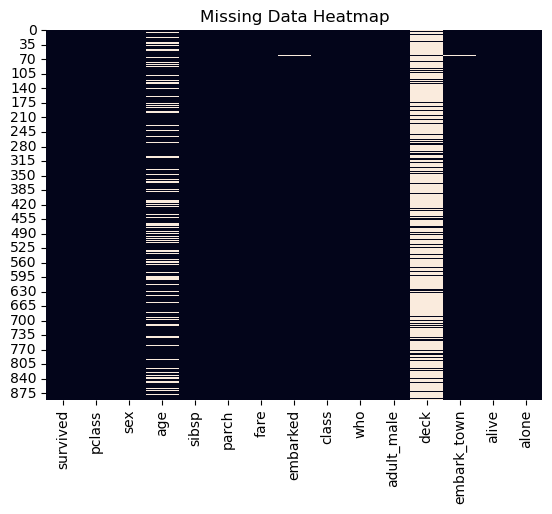

In [67]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

### Exercise 7

Explore outliers before and after scaling to understand how scaling interacts with outliers.

Identify potential outliers with boxplots and compare before/after scaling (StandardScaler, MinMaxScaler).

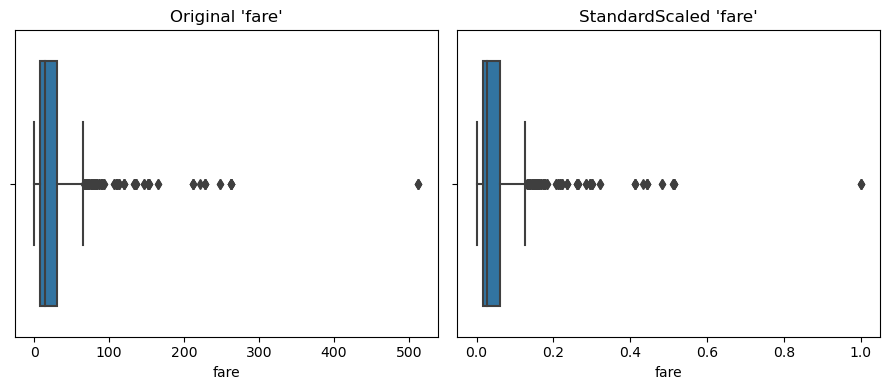

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(x=df['fare'], ax=axes[0])
axes[0].set_title("Original 'fare'")

sns.boxplot(x=scaled_minmax['fare'], ax=axes[1])
axes[1].set_title("StandardScaled 'fare'")

plt.tight_layout()
plt.show()

### Exercise 8

Explore correlation between variables.

Compute correlation matrix of numeric variables. Plot it with sns.heatmap().

Which features are most correlated? Could that affect model performance?

<AxesSubplot:>

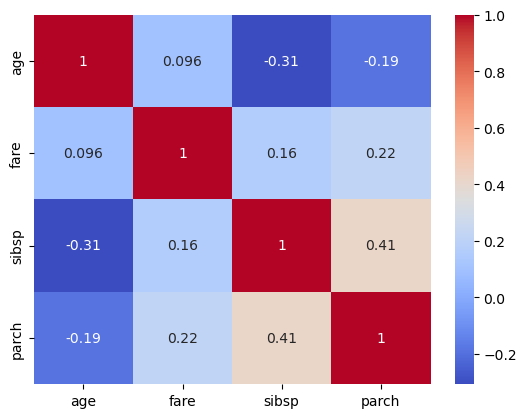

In [81]:
corr = df[['age','fare','sibsp','parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Exercise 9

Build a preprocessing pipeline that helps you consolidate all preprocessing steps and allows you to reuse it for new datasets.

### Exercise 10

Apply all the steps (or use the pipeline developed by yourself in *Exercise 9*) in order to preprocess a new dataset.

Proposed dataset: `sns.load_dataset("penguins")`

### Bonus: Practice on a custom dataset

Apply the learned skills to your own personal research data.

1. Bring a small CSV dataset from your own project.
2. Load it using pd.read_csv() and repeat:
    - Missing value handling
    - Encoding categorical variables
    - Scaling
    - Train/test split